## **New or Used ML model Meli notebook**

## Preparación y Análisis de Datos

Esta sección del notebook cubre la configuración y los pasos preliminares para la preparación y análisis de datos. Las siguientes bibliotecas y módulos se importan para apoyar diversas tareas:

- **json**: Para manejar archivos y datos JSON.
- **pandas**: Para la manipulación y análisis de datos.
- **os**: Para interactuar con el sistema operativo, específicamente para la gestión de archivos y directorios.
- **numpy**: Para operaciones numéricas y manipulaciones de arrays.
- **datetime**: Para trabajar con datos de fecha y hora.
- **sys**: Para manipular el entorno de ejecución de Python.
- **chardet**: Para la detección de codificación de caracteres.
- **sweetviz**: Para generar visualizaciones e informes de análisis exploratorio de datos.
- **utilities_meli**: Funciones utilitarias personalizadas específicas para el proyecto.

La variable `module_path` establece la ruta a los scripts de Python del proyecto, asegurando que los módulos personalizados puedan ser importados y utilizados.


In [1]:
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime
import sys
import chardet
import sweetviz as sv
module_path = os.path.abspath(os.path.join('/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI/', 'python_scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities_meli import * # type: ignore


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI")


 Carga y Visualización Inicial de Datos

En esta sección, se realiza la carga de los datos desde un archivo JSONL y se visualizan las primeras filas del DataFrame resultante para verificar su contenido. Los pasos son los siguientes:

1. **Leer el archivo JSONL**: Se utiliza la función `pd.read_json` de la biblioteca `pandas` para leer el archivo JSONL (`MLA_100k_checked_v3.jsonlines`) y cargar los datos en un DataFrame de `pandas`.
2. **Mostrar las primeras filas**: Se llama al método `head()` del DataFrame para mostrar las primeras filas, lo que permite una inspección rápida de la estructura y el contenido de los datos cargados.

In [4]:
# Leer el archivo JSONL como un DataFrame
df_productos = pd.read_json("data/Inputs/MLA_100k_checked_v3.jsonlines", lines=True)

# Mostrar las primeras filas del DataFrame
df_productos.head()

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],,MLA3133256685,[],MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,NaN,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https:/

## Normalización y Limpieza de Datos

En esta sección, se normalizan y limpian varios campos del DataFrame original para crear un DataFrame tabular consolidado. Los pasos son los siguientes:

1. **Normalización de la Dirección del Vendedor**:
   - Se extraen los datos de la columna `seller_address` del DataFrame original y se normalizan utilizando `pd.json_normalize`.
   - Se renombran algunas columnas para mayor claridad.

2. **Normalización del Envío**:
   - Se extraen los datos de la columna `shipping` y se normalizan.
   - Se elimina la columna `tag` si existe, ya que puede no ser necesaria.

3. **Normalización de los Atributos**:
   - Se extraen y normalizan los datos de la columna `attributes`.
   - Se separan los atributos en diferentes DataFrames (`df_attr_0` y `df_attr_1`).
   - Se renombran y eliminan columnas innecesarias para cada DataFrame de atributos.

4. **Métodos de Pago No Mercado Pago**:
   - Se extraen y normalizan los datos de la columna `non_mercado_pago_payment_methods`.
   - Se ajusta y renombra el primer conjunto de métodos de pago.

5. **Eliminación de Variables Iniciales**:
   - Se eliminan las columnas originales que fueron normalizadas para evitar duplicados.

6. **Concatenación de DataFrames**:
   - Se concatenan los DataFrames normalizados con el DataFrame tabular original.

7. **Reemplazo de Valores en la Columna de Condición**:
   - Se reemplazan los valores de `condition` ('new' por 1 y 'used' por 0) para facilitar el análisis.

A continuación se presenta el código para estos pasos:

In [5]:
df_seller = pd.json_normalize(df_productos['seller_address'])
df_seller.rename(columns={'country.name': 'country_name', 'country.id': 'country_id', 'state.name': 
                          'state_name', 'state.id': 'state_id', 'city.name': 'city_name', 'city.id': 'city_id' }, inplace=True)

#Shipping
df_shipping = pd.json_normalize(df_productos['shipping'])
df_shipping = df_shipping.drop(columns=['tag'], errors='ignore')

#attributes
df_attributes = pd.json_normalize(df_productos['attributes'])
df_attr_0 = pd.json_normalize(df_attributes[0])
df_attr_1 = pd.json_normalize(df_attributes[1])
df_attr_0.rename(columns={'value_name': 'season_name'}, inplace=True)
df_attr_0 = df_attr_0.drop(columns=['value_id', 'attribute_group_id', 'name', 'attribute_group_name','id'], errors='ignore')
df_attr_1.rename(columns={'value_name': 'gender_name'}, inplace=True)
df_attr_1 = df_attr_1.drop(columns=['value_id', 'attribute_group_id', 'name', 'attribute_group_name','id'], errors='ignore')

#Mdo Pago
df_mdopgo = pd.json_normalize(df_productos['non_mercado_pago_payment_methods'])
#Ajusto 0 las siguientes hasta 11 elimino por valores > Missing 
df_0 = pd.json_normalize(df_mdopgo[0])
df_0.rename(columns={'description': 'descrip_mdo_0', 'id': 'id_mdo_0', 'type': 'type_mdo_0'}, inplace=True)

#Elimino variables iniciales ajustadas
var_drop = ['seller_address', 'shipping', 'non_mercado_pago_payment_methods', 'pictures','attributes']
df_tabular = df_productos.drop(var_drop, axis=1)

# Concat df_ajust
df_productos_00 = pd.concat([df_tabular, df_seller, df_shipping, df_0, df_attr_0,df_attr_1], axis=1)

# Reemplazar 'new' por 1 y 'used' por 0 en la df_ajust
df_productos_00['target'] = df_productos_00['condition'].replace({'new': 1, 'used': 0})

In [6]:
#######################
# Target total data
#######################
perc_1 = (df_productos_00['target'].value_counts(normalize=True) * 100).get(1, 0)
print(f"Porcentaje 1s 'target': {perc_1}%")

porc_0 = (df_productos_00['target'].value_counts(normalize=True) * 100).get(0, 0)
print(f"Porcentaje 0s 'target': {porc_0}%")

Porcentaje 1s 'target': 53.757999999999996%
Porcentaje 0s 'target': 46.242%


In [7]:
#####################
# Control Registros
#####################
print(df_productos_00.dtypes)
# Número de columnas y filas
num_columnas = df_productos_00.shape[1]
num_filas = df_productos_00.shape[0]
print(f"\nNúmero de columnas: {num_columnas}")
print(f"Número de filas: {num_filas}")

warranty                               object
sub_status                             object
condition                              object
deal_ids                               object
base_price                            float64
seller_id                               int64
variations                             object
site_id                                object
listing_type_id                        object
price                                 float64
buying_mode                            object
tags                                   object
listing_source                         object
parent_item_id                         object
coverage_areas                         object
category_id                            object
descriptions                           object
last_updated                           object
international_delivery_mode            object
id                                     object
official_store_id                     float64
differential_pricing              

In [8]:
df_productos_00.columns

Index(['warranty', 'sub_status', 'condition', 'deal_ids', 'base_price',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity', 'country_name',
       'country_id', 'state_name', 'state_id', 'city_name', 'city_id',
       'local_pick_up', 'methods', 'tags', 'free_shipping', 'mode',
       'dimensions', 'free_methods', 'descrip_mdo_0', 'id_mdo_0', 'type_mdo_0',
       'season_name', 'gender_name', 'target'],
      dtype='object')

In [9]:
# Elimino algunas columnas que estan como tipo lista y en su mayoria son regsitros vacios
df_eda = df_productos_00.drop(columns=['sub_status', 'deal_ids', 'variations', 'tags', 'listing_source',
                   'coverage_areas', 'descriptions', 'thumbnail', 'secure_thumbnail', 'methods', 'free_methods'], errors='ignore')
#df_eda.columns

os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI/data/Outputs")

# Analisis EDA
# Analyzing the dataset
advert_report = sv.analyze(df_eda)
advert_report.show_html('EDA_BD_inicial_ML.html')

                                             |          | [  0%]   00:00 -> (? left)

/Users/juanmanuelpaiba/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/Users/juanmanuelpaiba/.pyenv/versions/3.8.17/lib/python3.8/site-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report EDA_BD_inicial_ML.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
df_eda.head()

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,parent_item_id,category_id,last_updated,international_delivery_mode,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,title,automatic_relist,date_created,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,country_name,country_id,state_name,state_id,city_name,city_id,local_pick_up,free_shipping,mode,dimensions,descrip_mdo_0,id_mdo_0,type_mdo_0,season_name,gender_name,target
0,None,new,80.0,8208882349,MLA,bronze,80.0,buy_it_now,MLA6553902747,MLA126406,2015-09-05T20:42:58.000Z,none,MLA4695330653,NaN,NaN,True,NaN,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,AR,Capital Federal,AR-C,San Cristóbal,TUxBQlNBTjkwNTZa,True,False,not_specified,None,Transferencia bancaria,MLATB,G,NaN,NaN,1
1,NUESTRA REPUTACION,used,2650.0,8141699488,MLA,silver,2650.0,buy_it_now,MLA7727150374,MLA10267,2015-09-26T18:08:34.000Z,none,MLA7160447179,NaN,NaN,True,NaN,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,AR,Capital Federal,AR-C,Buenos Aires,,True,False,me2,None,Transferencia bancaria,MLATB,G,NaN,NaN,0
2,None,used,60.0,8386096505,MLA,bronze,60.0,buy_it_now,MLA6561247998,MLA1227,2015-09-09T23:57:10.000Z,none,MLA7367189936,NaN,NaN,True,NaN,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa,True,False,me2,None,Transferencia bancaria,MLATB,G,NaN,NaN,0
3,None,new,580.0,5377752182,MLA,silver,580.0,buy_it_now,None,MLA86345,2015-10-05T16:03:50.306Z,none,MLA9191625553,NaN,NaN,True,NaN,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,AR,Capital Federal,AR-C,Floresta,TUxBQkZMTzg5MjFa,True,False,me2,None,Transferencia bancaria,MLATB,G,NaN,NaN,1
4,MI REPUTACION.,used,30.0,2938071313,MLA,bronze,30.0,buy_it_now,MLA3133256685,MLA41287,2015-08-28T13:37:41.000Z,none,MLA7787961817,NaN,NaN,True,NaN,ARS,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,2015-10-23 22:07:20,active,None,NaN,NaN,1,2015-08-24 22:07:20,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,Argentina,AR,Buenos Aires,AR-B,Tres de febrero,TUxBQ1RSRTMxODE5NA,True,False,not_specified,None,Transferencia bancaria,MLATB,G,NaN,NaN,0


In [11]:
df_eda.to_parquet("df_eda.parquet")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

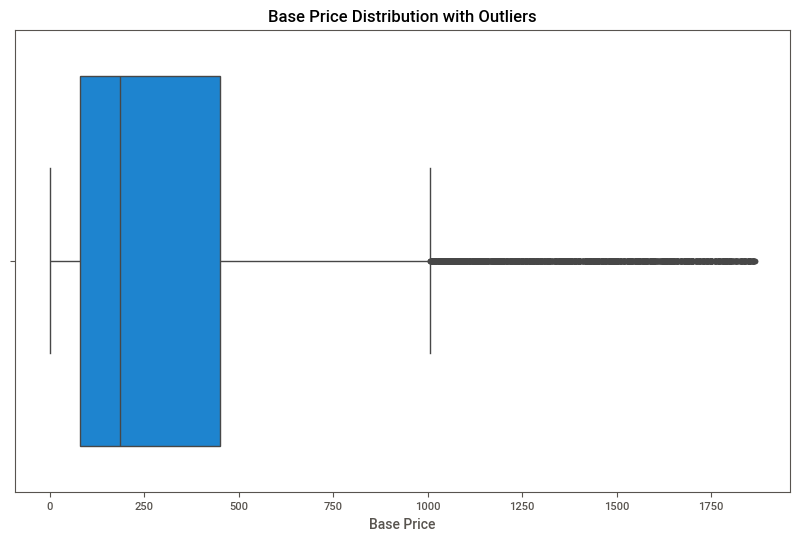

In [13]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the base_price column
df_train_no_outliers = remove_outliers(df_eda, 'base_price')
# Visualize the base_price variable before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train_no_outliers['base_price'])
plt.title('Base Price Distribution with Outliers')
plt.xlabel('Base Price')
plt.show()

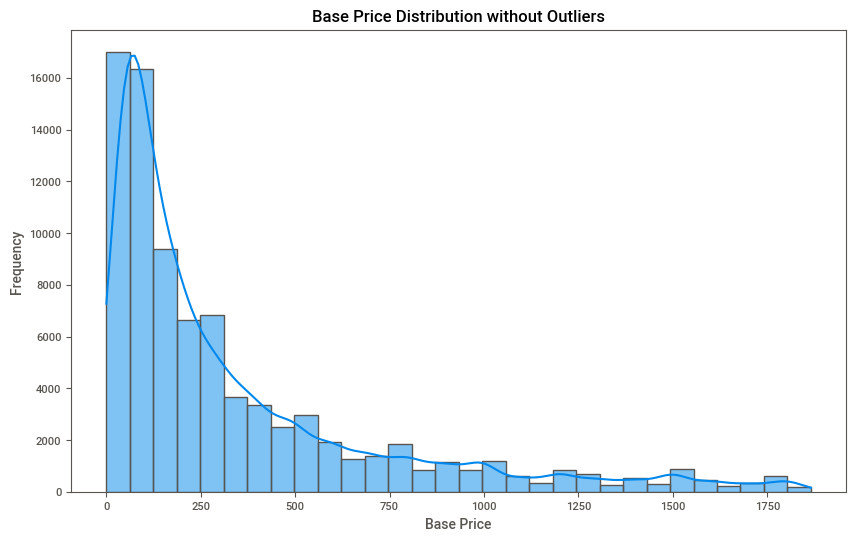

In [14]:
# Visualize the base_price variable with a histogram after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_train_no_outliers['base_price'], bins=30, kde=True)
plt.title('Base Price Distribution without Outliers')
plt.xlabel('Base Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_train_no_outliers.shape

(85365, 47)

In [16]:
df_eda.shape

(100000, 47)